In [1]:
pip install zipcodes basemap

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipcodes as zcode
import folium
from folium.plugins import MarkerCluster
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn import metrics 
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [4]:
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [5]:
df=pd.DataFrame(data)

In [6]:
df

ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  \
0        1   25           1      49     91107       4  1/60          1   
1        2   45          19      34     90089       3  1/50          1   
2        3   39          15      11     94720       1  1/00          1   
3        4   35           9     100     94112       1  2/70          2   
4        5   35           8      45     91330       4  1/00          2   
...    ...  ...         ...     ...       ...     ...   ...        ...   
4995  4996   29           3      40     92697       1  1/90          3   
4996  4997   30           4      15     92037       4  0/40          1   
4997  4998   63          39      24     93023       2  0/30          3   
4998  4999   65          40      49     90034       3  0/50          2   
4999  5000   28           4      83     92612       3  0/80          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [7]:
df.drop(columns="ID",inplace=True)

In [8]:
df

Age  Experience  Income  ZIP Code  Family CCAvg  Education  Mortgage  \
0      25           1      49     91107       4  1/60          1         0   
1      45          19      34     90089       3  1/50          1         0   
2      39          15      11     94720       1  1/00          1         0   
3      35           9     100     94112       1  2/70          2         0   
4      35           8      45     91330       4  1/00          2         0   
...   ...         ...     ...       ...     ...   ...        ...       ...   
4995   29           3      40     92697       1  1/90          3         0   
4996   30           4      15     92037       4  0/40          1        85   
4997   63          39      24     93023       2  0/30          3         0   
4998   65          40      49     90034       3  0/50          2         0   
4999   28           4      83     92612       3  0/80          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 13 columns]

In [9]:
##changing the CCAvg column type to float
cc_df=pd.DataFrame(df["CCAvg"].str.split("/",expand=True))
cc_df=cc_df[0]+"."+cc_df[1]
cc_df=pd.to_numeric(cc_df)
df.drop(columns="CCAvg",inplace=True)
df.insert(5,"CCAvg",cc_df)

In [10]:
#ccavg per year
df["CCAvg"]=df["CCAvg"]*12

In [11]:
df

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4   19.2          1         0   
1      45          19      34     90089       3   18.0          1         0   
2      39          15      11     94720       1   12.0          1         0   
3      35           9     100     94112       1   32.4          2         0   
4      35           8      45     91330       4   12.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4995   29           3      40     92697       1   22.8          3         0   
4996   30           4      15     92037       4    4.8          1        85   
4997   63          39      24     93023       2    3.6          3         0   
4998   65          40      49     90034       3    6.0          2         0   
4999   28           4      83     92612       3    9.6          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 13 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [13]:
df.describe()

Age   Experience       Income      ZIP Code       Family  \
count  5000.000000  5000.000000  5000.000000   5000.000000  5000.000000   
mean     45.338400    20.104600    73.774200  93152.503000     2.396400   
std      11.463166    11.467954    46.033729   2121.852197     1.147663   
min      23.000000    -3.000000     8.000000   9307.000000     1.000000   
25%      35.000000    10.000000    39.000000  91911.000000     1.000000   
50%      45.000000    20.000000    64.000000  93437.000000     2.000000   
75%      55.000000    30.000000    98.000000  94608.000000     3.000000   
max      67.000000    43.000000   224.000000  96651.000000     4.000000   

             CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000    5000.000000   
mean     23.255256     1.881000    56.498800       0.096000   
std      20.971908     0.839869   101.713802       0.294621   
min       0.000000     1.000000     0.000000       0.000000   
25%       8.400000     1.000000     0.000000       0.000000   
50%      18.000000     2.000000     0.000000       0.000000   
75%      30.000000     3.000000   101.000000       0.000000   
max     120.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [14]:
#exp is year it cannot be negative
df["Experience"]=df["Experience"].abs()

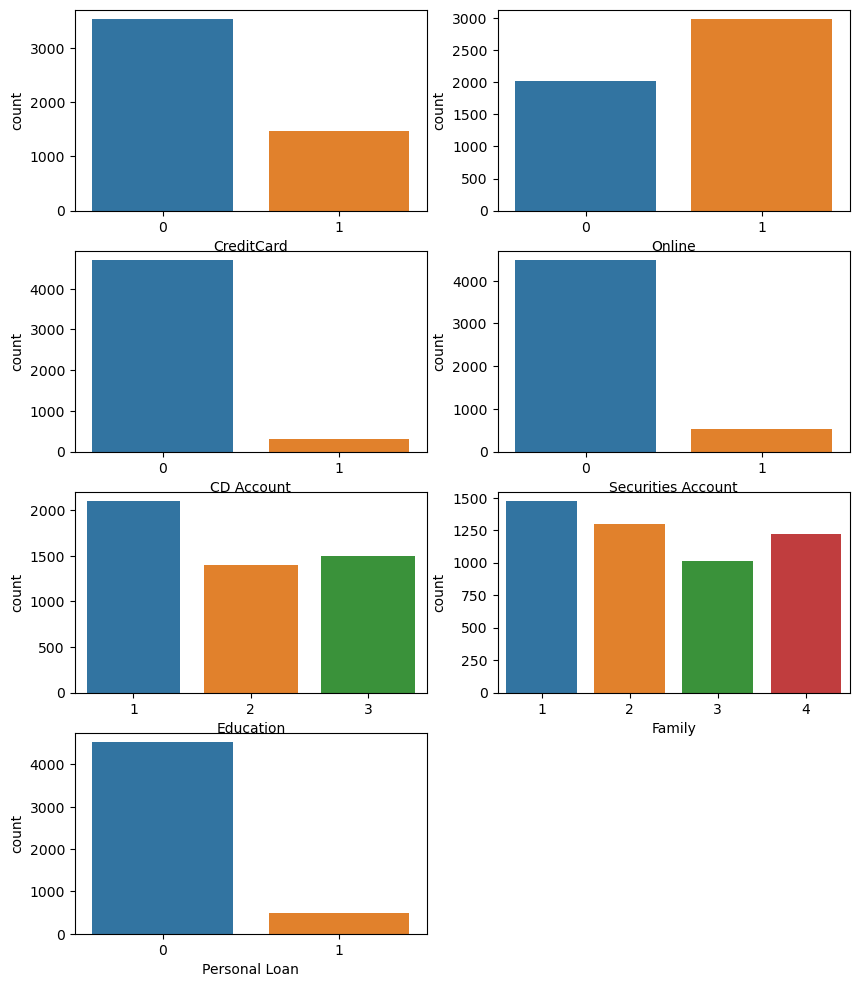

In [15]:
features1=["CreditCard","Online","CD Account","Securities Account","Education","Family","Personal Loan"]
i=0
fig=plt.figure(figsize=[10,12])
while i<7:
    plt.subplot(4,2,i+1)
    sns.countplot(x=features1[i],data=df)
    i+=1
plt.show()

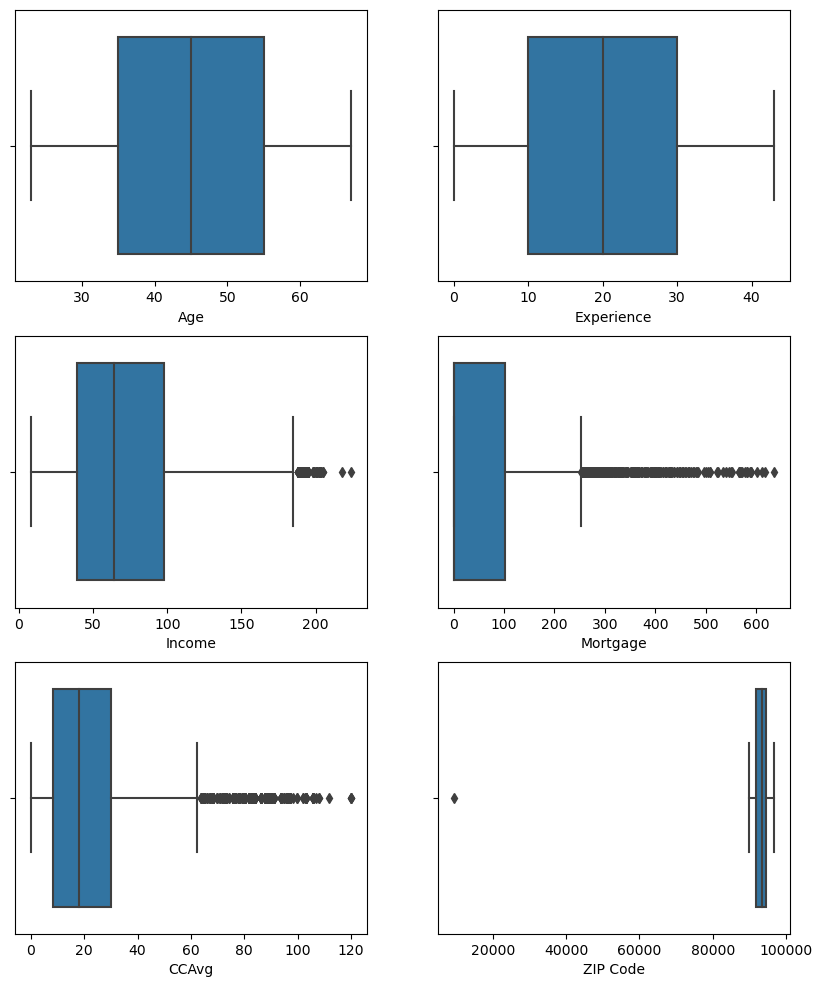

In [16]:
features2=["Age","Experience","Income","Mortgage","CCAvg","ZIP Code"]
i=0
plt.figure(figsize=(10,12))
while i<6:
    plt.subplot(3,2,i+1)
    sns.boxplot(x=features2[i],data=df)
    i+=1
plt.show()

Text(13000, 0.25, 'noise')

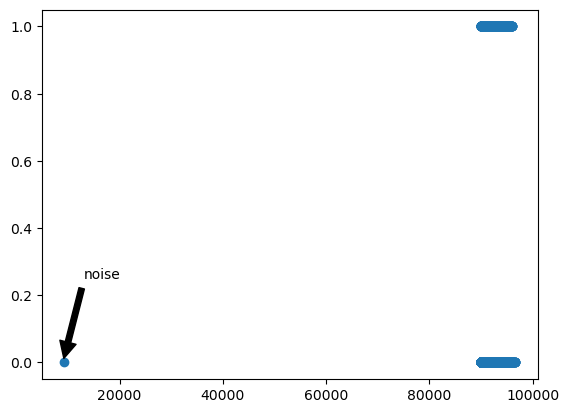

In [17]:
plt.scatter(df["ZIP Code"],df["Personal Loan"])
plt.annotate("noise",xy=(9000,0),xytext=(13000,0.25),arrowprops=dict(facecolor="black",shrink=0.05))

In [18]:
noise_zip=df[df["ZIP Code"]<20000]
noise_zip

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
384   51          25      21      9307       4    7.2          3         0   

     Personal Loan  Securities Account  CD Account  Online  CreditCard  
384              0                   0           0       1           1

In [19]:
df.drop(index=384,inplace=True)

In [20]:
zip_list=list(df["ZIP Code"])
country = []
lat = []
long = []
for x in zip_list:
    my_city_county=zcode.matching(str(x))
    if len(my_city_county)==1:
        county=my_city_county[0].get("county")
        my_lat=my_city_county[0].get("lat")
        my_long=my_city_county[0].get("long")
    else:
        county="not found"
        my_lat=np.NaN
        my_long=np.NaN
    country.insert(0,county)
    lat.insert(0,my_lat)
    long.insert(0,my_long)
country.reverse()
lat.reverse()
long.reverse()
df["Place"]=country
df["Latitude"]=lat
df["Longitude"]=long

In [21]:
df

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4   19.2          1         0   
1      45          19      34     90089       3   18.0          1         0   
2      39          15      11     94720       1   12.0          1         0   
3      35           9     100     94112       1   32.4          2         0   
4      35           8      45     91330       4   12.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4995   29           3      40     92697       1   22.8          3         0   
4996   30           4      15     92037       4    4.8          1        85   
4997   63          39      24     93023       2    3.6          3         0   
4998   65          40      49     90034       3    6.0          2         0   
4999   28           4      83     92612       3    9.6          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0                 0                   1           0       0           0   
1                 0                   1           0       0           0   
2                 0                   0           0       0           0   
3                 0                   0           0       0           0   
4                 0                   0           0       0           1   
...             ...                 ...         ...     ...         ...   
4995              0                   0           0       1           0   
4996              0                   0           0       1           0   
4997              0                   0           0       0           0   
4998              0                   0           0       1           0   
4999              0                   0           0       1           1   

                     Place Latitude  Longitude  
0       Los Angeles County  34.1620  -118.0894  
1       Los Angeles County  34.0218  -118.2883  
2           Alameda County  37.8746  -122.2547  
3     San Francisco County  37.7217  -122.4446  
4       Los Angeles County  34.2429  -118.5273  
...                    ...      ...        ...  
4995         Orange County  33.6473  -117.8409  
4996      San Diego County  32.8668  -117.2482  
4997        Ventura County  34.5210  -119.2477  
4998    Los Angeles County  34.0293  -118.3994  
4999         Orange County  33.6615  -117.8217  

[4999 rows x 16 columns]

In [22]:
df.isnull().sum()

Age                    0
Experience             0
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
Place                  0
Latitude              33
Longitude             33
dtype: int64

In [23]:
df[df["Latitude"].isnull()]["ZIP Code"].value_counts()

92717    22
96651     6
92634     5
Name: ZIP Code, dtype: int64

In [24]:
def highlit_cols(s):
    color="yellow"
    return 'background-color: %s '% color

In [25]:
#replacing place,long,lat from data in internet
z_92717=list(df[df["ZIP Code"]==92717].index)
for x in z_92717:
    df["Place"].loc[x]="irvine"
    df["Latitude"].loc[x]=33.6462
    df["Longitude"].loc[x]=-117.8398
df[df["ZIP Code"]==92717].style.applymap(highlit_cols,subset=pd.IndexSlice[:,["Personal Loan"]])

C:\Users\test\AppData\Local\Temp\ipykernel_20652\225180456.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Place"].loc[x]="irvine"
C:\Users\test\AppData\Local\Temp\ipykernel_20652\225180456.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Latitude"].loc[x]=33.6462
C:\Users\test\AppData\Local\Temp\ipykernel_20652\225180456.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Longitude"].loc[x]=-117.8398


In [26]:
z_96651=list(df[df["ZIP Code"]==96651].index)
for x in z_96651:
    df["Place"].loc[x]="EL Dorado"
    df["Latitude"].loc[x]=38.81781
    df["Longitude"].loc[x]=-120.92925
df[df["ZIP Code"]==96651].style.applymap(highlit_cols,subset=pd.IndexSlice[:,["Personal Loan"]])

C:\Users\test\AppData\Local\Temp\ipykernel_20652\3654889756.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Place"].loc[x]="EL Dorado"
C:\Users\test\AppData\Local\Temp\ipykernel_20652\3654889756.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Latitude"].loc[x]=38.81781
C:\Users\test\AppData\Local\Temp\ipykernel_20652\3654889756.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Longitude"].loc[x]=-120.92925


In [27]:
z_92634=list(df[df["ZIP Code"]==92634].index)
for x in z_92634:
    df["Place"].loc[x]="Fullerton"
    df["Latitude"].loc[x]=33.8739
    df["Longitude"].loc[x]=-117.9028
df[df["ZIP Code"]==92634].style.applymap(highlit_cols,subset=pd.IndexSlice[:,["Personal Loan"]])

C:\Users\test\AppData\Local\Temp\ipykernel_20652\3250502535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Place"].loc[x]="Fullerton"
C:\Users\test\AppData\Local\Temp\ipykernel_20652\3250502535.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Latitude"].loc[x]=33.8739
C:\Users\test\AppData\Local\Temp\ipykernel_20652\3250502535.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Longitude"].loc[x]=-117.9028


In [28]:
df["Latitude"]=pd.to_numeric(df["Latitude"])
df["Longitude"]=pd.to_numeric(df["Longitude"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4999 non-null   int64  
 1   Experience          4999 non-null   int64  
 2   Income              4999 non-null   int64  
 3   ZIP Code            4999 non-null   int64  
 4   Family              4999 non-null   int64  
 5   CCAvg               4999 non-null   float64
 6   Education           4999 non-null   int64  
 7   Mortgage            4999 non-null   int64  
 8   Personal Loan       4999 non-null   int64  
 9   Securities Account  4999 non-null   int64  
 10  CD Account          4999 non-null   int64  
 11  Online              4999 non-null   int64  
 12  CreditCard          4999 non-null   int64  
 13  Place               4999 non-null   object 
 14  Latitude            4999 non-null   float64
 15  Longitude           4999 non-null   float64
dtypes: flo

In [29]:

data = {
    "lat": df["Latitude"],  # replace ... with your latitudes
    "lon": df["Longitude"],  # replace ... with your longitudes
    "loan": df["Personal Loan"]  # replace ... with your loan values (1 or 0)
}

your_dataframe = pd.DataFrame(data)

# Create a map centered around the USA
map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a MarkerCluster
marker_cluster = MarkerCluster().add_to(map)

# Add markers for each person in your dataset to the MarkerCluster
for index, row in your_dataframe.iterrows():
    color = "red" if row["loan"] == 1 else "blue"
    folium.Marker([row["lat"], row["lon"]], icon=folium.Icon(color=color)).add_to(marker_cluster)

# Save the map to an HTML file
map.save("loan_recipients_map_clustered.html")
map

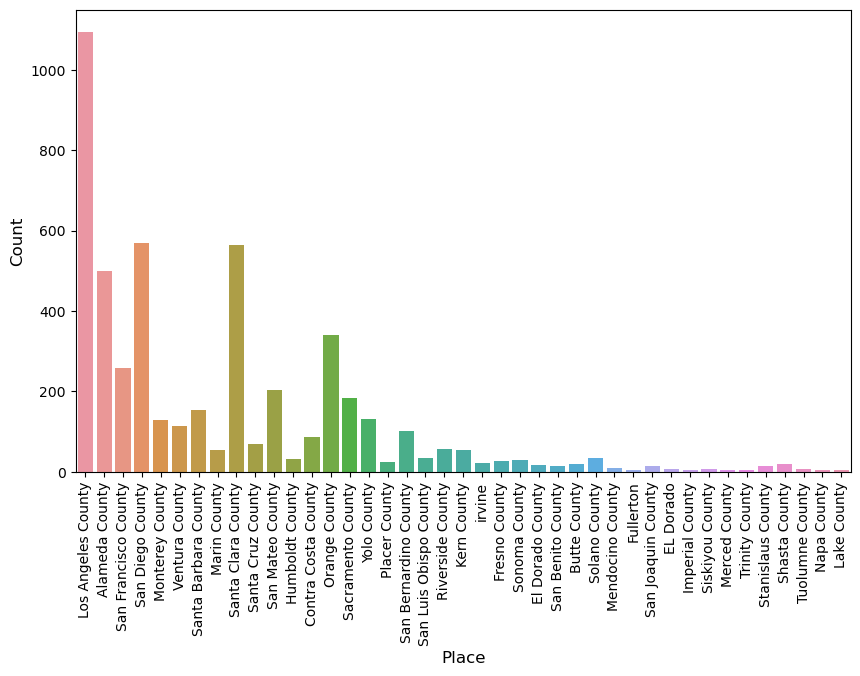

In [30]:
data = df["Place"]
count_df = pd.DataFrame(data)
plt.figure(figsize=(10,6))

# Create count plot
ax = sns.countplot(x='Place', data=count_df)

# Rotate x-axis labels to 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set xlabel, ylabel, and adjust fontsize
plt.xlabel('Place', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

C:\Users\test\AppData\Local\Temp\ipykernel_20652\309355612.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


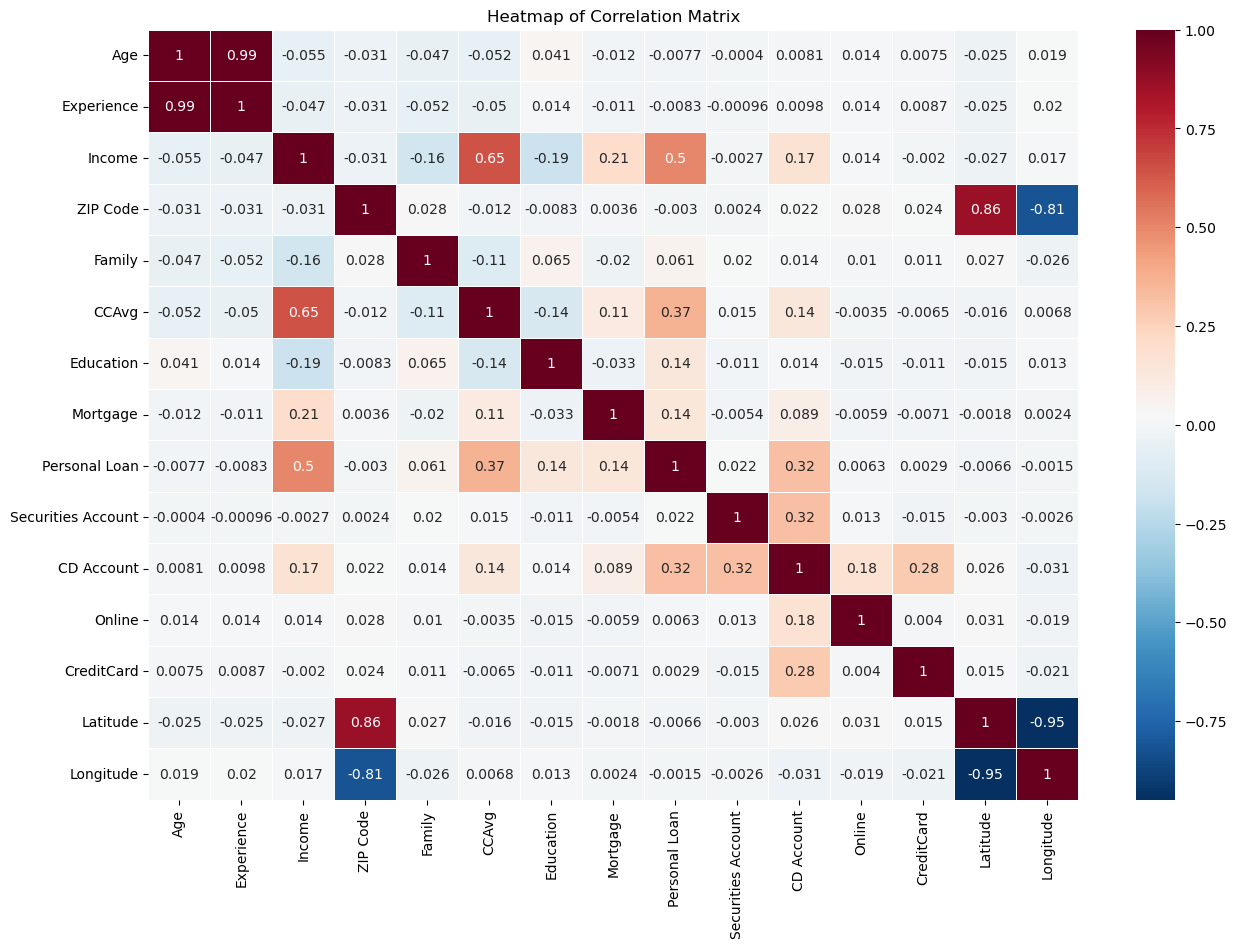

In [31]:
fig = plt.subplots(figsize=(15,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix ,cbar=True, cmap='RdBu_r', annot=True, linewidth=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140')])

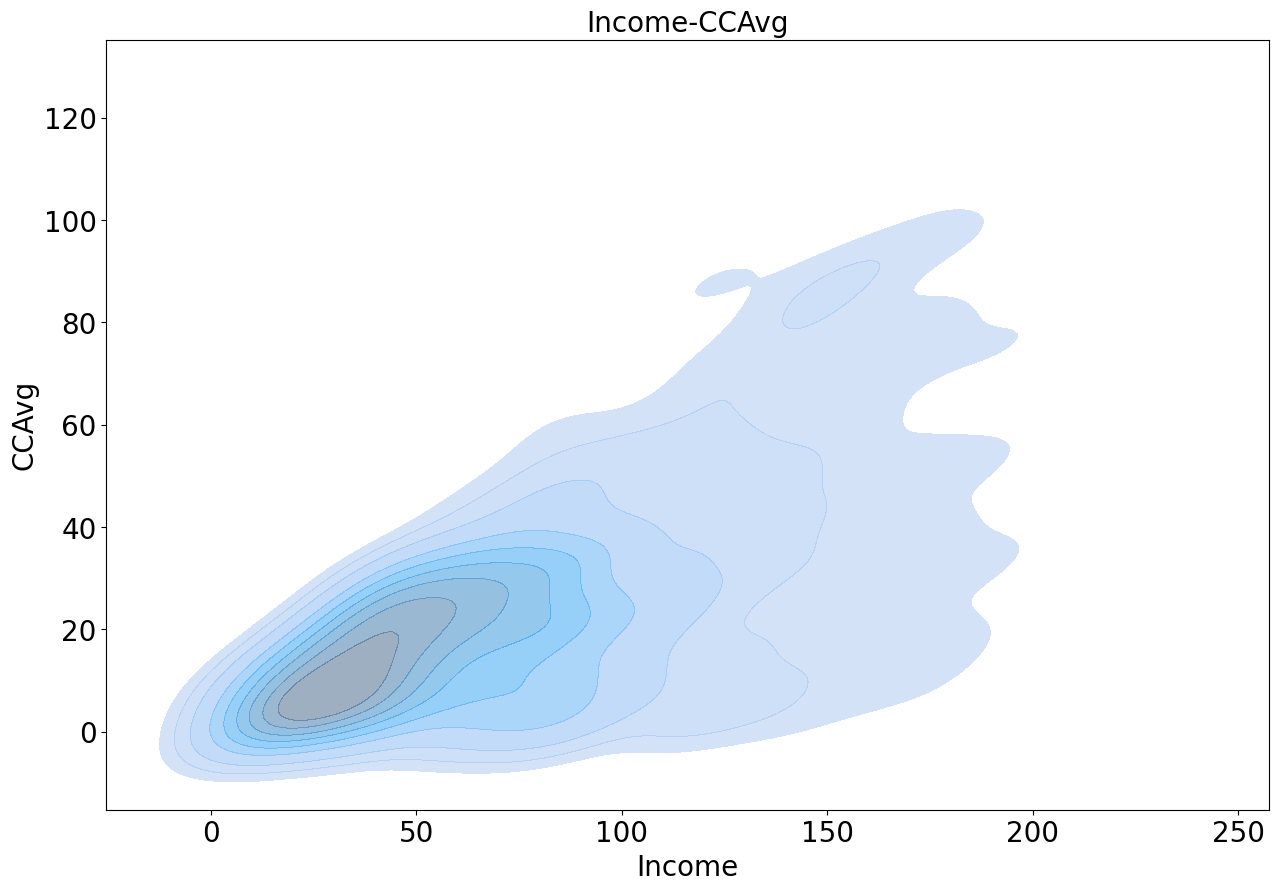

In [32]:
plt.figure(figsize=(15,10))
sns.kdeplot(x=df["Income"], y=df["CCAvg"], fill=True, common_norm=False, alpha=0.5)
plt.title("Income-CCAvg", fontsize=20)  
plt.xlabel("Income", fontsize=20)
plt.ylabel("CCAvg", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


In [33]:
new_df = df[df["Personal Loan"] == 1].copy()
new_df.describe()

Age  Experience      Income      ZIP Code      Family  \
count  480.000000  480.000000  480.000000    480.000000  480.000000   
mean    45.066667   19.843750  144.745833  93153.202083    2.612500   
std     11.590964   11.582443   31.584429   1759.223753    1.115393   
min     26.000000    0.000000   60.000000  90016.000000    1.000000   
25%     35.000000    9.000000  122.000000  91908.750000    2.000000   
50%     45.000000   20.000000  142.500000  93407.000000    3.000000   
75%     55.000000   30.000000  172.000000  94705.500000    4.000000   
max     65.000000   41.000000  203.000000  96008.000000    4.000000   

            CCAvg   Education    Mortgage  Personal Loan  Securities Account  \
count  480.000000  480.000000  480.000000          480.0          480.000000   
mean    46.864250    2.233333  100.845833            1.0            0.125000   
std     25.172174    0.753373  160.847862            0.0            0.331064   
min      0.000000    1.000000    0.000000            1.0            0.000000   
25%     31.200000    2.000000    0.000000            1.0            0.000000   
50%     45.600000    2.000000    0.000000            1.0            0.000000   
75%     64.170000    3.000000  192.500000            1.0            0.000000   
max    120.000000    3.000000  617.000000            1.0            1.000000   

       CD Account     Online  CreditCard    Latitude   Longitude  
count  480.000000  480.00000  480.000000  480.000000  480.000000  
mean     0.291667    0.60625    0.297917   35.742020 -120.036633  
std      0.455004    0.48909    0.457820    2.066798    2.087046  
min      0.000000    0.00000    0.000000   32.554700 -124.099400  
25%      0.000000    0.00000    0.000000   34.001325 -122.143400  
50%      0.000000    1.00000    0.000000   35.301700 -119.847500  
75%      1.000000    1.00000    1.000000   37.654575 -118.115700  
max      1.000000    1.00000    1.000000   40.839600 -116.837100

In [173]:
x=df.drop(columns=["Personal Loan","Place"],axis=1)
y=df["Personal Loan"].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
logreg=LogisticRegression(solver="liblinear",C=50)
logreg.fit(x_train,y_train)
y_predict=logreg.predict(x_test)
print("f1 score : ",metrics.f1_score(y_test,y_predict))

f1 score :  0.3142857142857143


C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [242]:
def logreg_eval(X, y, Test_size):
    df_evaluation = pd.DataFrame()
    
    for x in range(10,Test_size+1):
        # Use train_test_split on X and y
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=x/100, random_state=0)
        
        # Initialize the Logistic Regression model
        logreg = LogisticRegression(solver="liblinear",C=50)
        
        # Fit the model on the training data
        logreg.fit(X_train, y_train)
        
        # Predict on the test data
        y_predict = logreg.predict(X_test)
        
        # Calculate accuracy and score
        accuracy = metrics.accuracy_score(y_test, y_predict)
        score = metrics.f1_score(y_test,y_predict)
        
        # Create a dataframe for the results
        result = pd.DataFrame({"test_size": [x], "accuracy": [accuracy], "f1-score": [score]})
        
        # Append the result to the DataFrame(used concat to avoid warning)
        df_evaluation = pd.concat([df_evaluation,result], ignore_index=True)
    
    return df_evaluation



In [175]:
def highlight_max(value):
    # Function to highlight the maximum value in a Series
    is_max = value == value.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [176]:
df_eval=logreg_eval(x,y,30)

C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [177]:
df_eval.style.apply(highlight_max)

In [178]:
df

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4   19.2          1         0   
1      45          19      34     90089       3   18.0          1         0   
2      39          15      11     94720       1   12.0          1         0   
3      35           9     100     94112       1   32.4          2         0   
4      35           8      45     91330       4   12.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4995   29           3      40     92697       1   22.8          3         0   
4996   30           4      15     92037       4    4.8          1        85   
4997   63          39      24     93023       2    3.6          3         0   
4998   65          40      49     90034       3    6.0          2         0   
4999   28           4      83     92612       3    9.6          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0                 0                   1           0       0           0   
1                 0                   1           0       0           0   
2                 0                   0           0       0           0   
3                 0                   0           0       0           0   
4                 0                   0           0       0           1   
...             ...                 ...         ...     ...         ...   
4995              0                   0           0       1           0   
4996              0                   0           0       1           0   
4997              0                   0           0       0           0   
4998              0                   0           0       1           0   
4999              0                   0           0       1           1   

                     Place  Latitude  Longitude  
0       Los Angeles County   34.1620  -118.0894  
1       Los Angeles County   34.0218  -118.2883  
2           Alameda County   37.8746  -122.2547  
3     San Francisco County   37.7217  -122.4446  
4       Los Angeles County   34.2429  -118.5273  
...                    ...       ...        ...  
4995         Orange County   33.6473  -117.8409  
4996      San Diego County   32.8668  -117.2482  
4997        Ventura County   34.5210  -119.2477  
4998    Los Angeles County   34.0293  -118.3994  
4999         Orange County   33.6615  -117.8217  

[4999 rows x 16 columns]

In [179]:
df2=df.copy()
df2.drop(columns=["Place","ZIP Code","CreditCard"],inplace=True)

In [180]:
accuracy = metrics.accuracy_score(y_test, y_predict)
my_df=df2.copy()
my_df.drop(columns="Personal Loan",inplace=True)
for column in my_df:
    df2.insert(0,f"{column}**2",df[column]**2)
    x=df2.drop(columns=["Personal Loan"],axis=1)
    y=df2["Personal Loan"].values.reshape(-1,1)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
    logreg=LogisticRegression(solver="liblinear",C=50)
    logreg.fit(x_train,y_train)
    y_predict=logreg.predict(x_test)
    accuracy2 = metrics.accuracy_score(y_test, y_predict)
    if accuracy2>accuracy:
        print(f"{accuracy2-accuracy}improve for {column} column")
        accuracy=accuracy2
    else:
        df2.drop(columns=f"{column}**2",inplace=True)

C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

0.03200000000000003improve for Age column
0.016999999999999904improve for Income column
0.0010000000000000009improve for Family column


C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [181]:
df2

Family**2  Income**2  Age**2  Age  Experience  Income  Family  CCAvg  \
0            16       2401     625   25           1      49       4   19.2   
1             9       1156    2025   45          19      34       3   18.0   
2             1        121    1521   39          15      11       1   12.0   
3             1      10000    1225   35           9     100       1   32.4   
4            16       2025    1225   35           8      45       4   12.0   
...         ...        ...     ...  ...         ...     ...     ...    ...   
4995          1       1600     841   29           3      40       1   22.8   
4996         16        225     900   30           4      15       4    4.8   
4997          4        576    3969   63          39      24       2    3.6   
4998          9       2401    4225   65          40      49       3    6.0   
4999          9       6889     784   28           4      83       3    9.6   

      Education  Mortgage  Personal Loan  Securities Account  CD Account  \
0             1         0              0                   1           0   
1             1         0              0                   1           0   
2             1         0              0                   0           0   
3             2         0              0                   0           0   
4             2         0              0                   0           0   
...         ...       ...            ...                 ...         ...   
4995          3         0              0                   0           0   
4996          1        85              0                   0           0   
4997          3         0              0                   0           0   
4998          2         0              0                   0           0   
4999          1         0              0                   0           0   

      Online  Latitude  Longitude  
0          0   34.1620  -118.0894  
1          0   34.0218  -118.2883  
2          0   37.8746  -122.2547  
3          0   37.7217  -122.4446  
4          0   34.2429  -118.5273  
...      ...       ...        ...  
4995       1   33.6473  -117.8409  
4996       1   32.8668  -117.2482  
4997       0   34.5210  -119.2477  
4998       1   34.0293  -118.3994  
4999       1   33.6615  -117.8217  

[4999 rows x 16 columns]

In [182]:
df

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4   19.2          1         0   
1      45          19      34     90089       3   18.0          1         0   
2      39          15      11     94720       1   12.0          1         0   
3      35           9     100     94112       1   32.4          2         0   
4      35           8      45     91330       4   12.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4995   29           3      40     92697       1   22.8          3         0   
4996   30           4      15     92037       4    4.8          1        85   
4997   63          39      24     93023       2    3.6          3         0   
4998   65          40      49     90034       3    6.0          2         0   
4999   28           4      83     92612       3    9.6          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0                 0                   1           0       0           0   
1                 0                   1           0       0           0   
2                 0                   0           0       0           0   
3                 0                   0           0       0           0   
4                 0                   0           0       0           1   
...             ...                 ...         ...     ...         ...   
4995              0                   0           0       1           0   
4996              0                   0           0       1           0   
4997              0                   0           0       0           0   
4998              0                   0           0       1           0   
4999              0                   0           0       1           1   

                     Place  Latitude  Longitude  
0       Los Angeles County   34.1620  -118.0894  
1       Los Angeles County   34.0218  -118.2883  
2           Alameda County   37.8746  -122.2547  
3     San Francisco County   37.7217  -122.4446  
4       Los Angeles County   34.2429  -118.5273  
...                    ...       ...        ...  
4995         Orange County   33.6473  -117.8409  
4996      San Diego County   32.8668  -117.2482  
4997        Ventura County   34.5210  -119.2477  
4998    Los Angeles County   34.0293  -118.3994  
4999         Orange County   33.6615  -117.8217  

[4999 rows x 16 columns]

In [183]:
print(accuracy)

0.954


In [184]:

accuracy = metrics.accuracy_score(y_test, y_predict)
df3=df2.copy()
df3.drop(columns="Personal Loan",inplace=True)
df4=df3.copy()
df4=df4[["Income","CCAvg","CD Account","Education","Mortgage"]]
df3.drop(columns=["Income","CCAvg","CD Account","Education","Mortgage"],inplace=True)
for column in df4:
    for my_column in df3:
        df_temp = df2.copy()
        df_temp.insert(0, f"{column}*{my_column}", df2[column] * df2[my_column])

        x = df_temp.drop(columns=["Personal Loan"], axis=1)
        y = df_temp["Personal Loan"].values.reshape(-1, 1)

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

        logreg = LogisticRegression(solver="liblinear", C=50)
        logreg.fit(x_train, y_train)

        y_predict = logreg.predict(x_test)
        accuracy2 = metrics.accuracy_score(y_test, y_predict)

        if accuracy2 > accuracy:
            print(f"{accuracy2 - accuracy} improvement for {column}*{my_column} interaction term")
            accuracy = accuracy2
            df2.insert(0, f"{column}*{my_column}", df2[column] * df2[my_column])



C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

0.007000000000000006 improvement for Income*Family**2 interaction term
0.0020000000000000018 improvement for Income*Age interaction term
0.0020000000000000018 improvement for Income*Experience interaction term


C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

0.0040000000000000036 improvement for Education*Family**2 interaction term
0.0020000000000000018 improvement for Education*Income**2 interaction term


C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

0.0010000000000000009 improvement for Education*Securities Account interaction term


C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

0.0030000000000000027 improvement for Mortgage*Family**2 interaction term


C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

0.0020000000000000018 improvement for Mortgage*Family interaction term


C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [185]:
df2

Mortgage*Family  Mortgage*Family**2  Education*Securities Account  \
0                   0                   0                             1   
1                   0                   0                             1   
2                   0                   0                             0   
3                   0                   0                             0   
4                   0                   0                             0   
...               ...                 ...                           ...   
4995                0                   0                             0   
4996              340                1360                             0   
4997                0                   0                             0   
4998                0                   0                             0   
4999                0                   0                             0   

      Education*Income**2  Education*Family**2  Income*Experience  Income*Age  \
0                    2401                   16                 49        1225   
1                    1156                    9                646        1530   
2                     121                    1                165         429   
3                   20000                    2                900        3500   
4                    4050                   32                360        1575   
...                   ...                  ...                ...         ...   
4995                 4800                    3                120        1160   
4996                  225                   16                 60         450   
4997                 1728                   12                936        1512   
4998                 4802                   18               1960        3185   
4999                 6889                    9                332        2324   

      Income*Family**2  Family**2  Income**2  ...  Family  CCAvg  Education  \
0                  784         16       2401  ...       4   19.2          1   
1                  306          9       1156  ...       3   18.0          1   
2                   11          1        121  ...       1   12.0          1   
3                  100          1      10000  ...       1   32.4          2   
4                  720         16       2025  ...       4   12.0          2   
...                ...        ...        ...  ...     ...    ...        ...   
4995                40          1       1600  ...       1   22.8          3   
4996               240         16        225  ...       4    4.8          1   
4997                96          4        576  ...       2    3.6          3   
4998               441          9       2401  ...       3    6.0          2   
4999               747          9       6889  ...       3    9.6          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      Latitude  Longitude  
0      34.1620  -118.0894  
1      34.0218  -118.2883  
2      37.8746  -122.2547  
3      37.7217  -122.4446  
4      34.2429  -118.5273  
...        ...        ...  
4995   33.6473  -117.8409  
4996   32.8668  -117.2482  
4997   34.5210  -119.2477  
4998   34.0293  -118.3994 

In [186]:
print(accuracy)

0.977


In [187]:
for column in df2:
    print(column)

Mortgage*Family
Mortgage*Family**2
Education*Securities Account
Education*Income**2
Education*Family**2
Income*Experience
Income*Age
Income*Family**2
Family**2
Income**2
Age**2
Age
Experience
Income
Family
CCAvg
Education
Mortgage
Personal Loan
Securities Account
CD Account
Online
Latitude
Longitude


In [188]:
df4

Income  CCAvg  CD Account  Education  Mortgage
0         49   19.2           0          1         0
1         34   18.0           0          1         0
2         11   12.0           0          1         0
3        100   32.4           0          2         0
4         45   12.0           0          2         0
...      ...    ...         ...        ...       ...
4995      40   22.8           0          3         0
4996      15    4.8           0          1        85
4997      24    3.6           0          3         0
4998      49    6.0           0          2         0
4999      83    9.6           0          1         0

[4999 rows x 5 columns]

In [189]:
confusion_matrix(y_test,y_predict)

array([[893,   6],
       [ 21,  80]], dtype=int64)

In [220]:
x_test

Education**2  CD Account**2   CCAvg**2  Mortgage**2  Mortgage*Family  \
4586             9              0   696.9600            0                0   
1594             1              0  1128.9600            0                0   
563              1              0   144.0000            0                0   
826              4              0    64.6416            0                0   
3778             4              0    51.8400            0                0   
...            ...            ...        ...          ...              ...   
4695             1              0  1128.9600            0                0   
2240             9              0     5.7600        27889              668   
1044             4              0     5.7600         6889               83   
631              4              0   144.0000            0                0   
1381             4              0     5.7600            0                0   

      Mortgage*Family**2  Education*Securities Account  Education*Income**2  \
4586                   0                             0                11163   
1594                   0                             1                 8649   
563                    0                             0                  144   
826                    0                             0                 1058   
3778                   0                             0                  392   
...                  ...                           ...                  ...   
4695                   0                             0                 4900   
2240                2672                             3                19683   
1044                  83                             0                12482   
631                    0                             0                 3200   
1381                   0                             0                  968   

      Education*Family**2  Income*Experience  ...  Income  Family  CCAvg  \
4586                   27               1952  ...      61       3  26.40   
1594                    1               1116  ...      93       1  33.60   
563                    16                324  ...      12       4  12.00   
826                    18                483  ...      23       3   8.04   
3778                   32                574  ...      14       4   7.20   
...                   ...                ...  ...     ...     ...    ...   
4695                    1               1330  ...      70       1  33.60   
2240                   48               1377  ...      81       4   2.40   
1044                    2               1896  ...      79       1   2.40   
631                    18                720  ...      40       3  12.00   
1381                   18                264  ...      22       3   2.40   

      Education  Mortgage  Securities Account  CD Account  Online  Latitude  \
4586          3         0                   0           0       1   32.6357   
1594          1         0                   1           0       1   34.0454   
563           1         0                   0           0       1   37.8347   
826           2         0                   0           0       1   35.6843   
3778          2         0                   0           0       0   38.5817   
...         ...       ...                 ...         ...     ...       ...   
4695          1         0                   0           0       0   38.5925   
2240          3       167                   1           0       0   33.7882   
1044          2        83                   0           0       1   38.5558   
631           2         0                   0           0       1   37.9921   
1381          2         0                   0           0       1   34.4194   

      Longitude  
4586  -117.0526  
1594  -118.4436  
563   -122.2919  
826   -117.4154  
3778  -121.4959  
...         ...  
4695  -121.5423  
2240  -117.8817  
1044  -121.3242  
631   -122.5813  
1381  -118.5558  

[1000 rows x 25 columns]

In [191]:
my_df=df2[["Mortgage","CCAvg","CD Account","Education"]]
for column in my_df:
    df2.insert(0,f"{column}**2",df[column]**2)

In [192]:
df2

Education**2  CD Account**2  CCAvg**2  Mortgage**2  Mortgage*Family  \
0                1              0    368.64            0                0   
1                1              0    324.00            0                0   
2                1              0    144.00            0                0   
3                4              0   1049.76            0                0   
4                4              0    144.00            0                0   
...            ...            ...       ...          ...              ...   
4995             9              0    519.84            0                0   
4996             1              0     23.04         7225              340   
4997             9              0     12.96            0                0   
4998             4              0     36.00            0                0   
4999             1              0     92.16            0                0   

      Mortgage*Family**2  Education*Securities Account  Education*Income**2  \
0                      0                             1                 2401   
1                      0                             1                 1156   
2                      0                             0                  121   
3                      0                             0                20000   
4                      0                             0                 4050   
...                  ...                           ...                  ...   
4995                   0                             0                 4800   
4996                1360                             0                  225   
4997                   0                             0                 1728   
4998                   0                             0                 4802   
4999                   0                             0                 6889   

      Education*Family**2  Income*Experience  ...  Family  CCAvg  Education  \
0                      16                 49  ...       4   19.2          1   
1                       9                646  ...       3   18.0          1   
2                       1                165  ...       1   12.0          1   
3                       2                900  ...       1   32.4          2   
4                      32                360  ...       4   12.0          2   
...                   ...                ...  ...     ...    ...        ...   
4995                    3                120  ...       1   22.8          3   
4996                   16                 60  ...       4    4.8          1   
4997                   12                936  ...       2    3.6          3   
4998                   18               1960  ...       3    6.0          2   
4999                    9                332  ...       3    9.6          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      Latitude  Longitude  
0      34.1620  -118.0894  
1      34.0218  -118.2883  
2      37.8746  -122.2547  
3      37.7217  -122.4446  
4      34.2429  -118.5273  
...        ...        ...  
4995   33.6473  -117.8409  
4996   32.8668  -117.2482  
4997   34.5210  -119.2477  
4998   34.0293  -118.3994 

In [245]:
x = df2.drop(columns=["Personal Loan"], axis=1)
y = df2["Personal Loan"].values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.26, random_state=0)

logreg = LogisticRegression(solver="liblinear", C=50)
logreg.fit(x_train, y_train)

y_predict = logreg.predict(x_test)
accuracy2 = metrics.accuracy_score(y_test, y_predict)

C:\Users\test\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [246]:
print(accuracy2)

0.9807692307692307


In [247]:
confusion_matrix(y_test,y_predict)

array([[1165,    7],
       [  18,  110]], dtype=int64)

In [258]:
print("f1 score : ",metrics.f1_score(y_test,y_predict))

f1 score :  0.8979591836734694


In [262]:
report=classification_report(y_test,y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1172
           1       0.94      0.86      0.90       128

    accuracy                           0.98      1300
   macro avg       0.96      0.93      0.94      1300
weighted avg       0.98      0.98      0.98      1300



In [281]:
df_eval2.style.apply(highlight_max)

In [280]:
df_eval2=logreg_eval(X,Y,30)

In [284]:
X=df.drop(['Personal Loan',"Place"],axis=1)
Y=df['Personal Loan']
gb_clf=GradientBoostingClassifier(random_state=0)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)
gb_clf.fit(X_train,Y_train)
y_pred_clf=gb_clf.predict(X_test)
confusion_matrix(Y_test,y_pred_clf)

array([[897,   2],
       [ 10,  91]], dtype=int64)

In [285]:
report=classification_report(Y_test,y_pred_clf)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       899
           1       0.98      0.90      0.94       101

    accuracy                           0.99      1000
   macro avg       0.98      0.95      0.97      1000
weighted avg       0.99      0.99      0.99      1000



In [279]:
 metrics.f1_score(Y_test, y_pred_clf, average='macro')

0.965749905812241